In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringcampaign.csv'
df = pd.read_csv(url, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Preprocessing
#### Kita akan melakukan preprocessing terlebih dahulu

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Sebagian besar data sudah numeric, dan ada beberapa data object. Mungkin data tersebut bisa kita ubah ke numeric dengan labeling.
Data ID dapat didrop karena merupakan identifier saja.

In [298]:
df_new = df.copy()
df_new = df_new.drop(['ID'], axis=1)

Akan ditampilkan dulu pembagian Education

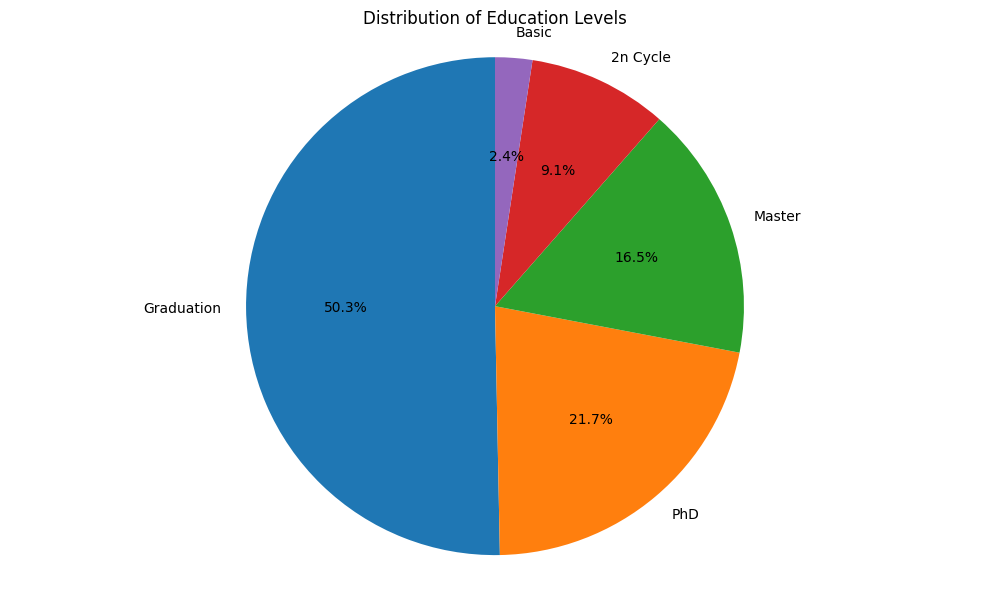

Education Level Counts:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [299]:
education_counts = df_new['Education'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Education Levels')
plt.tight_layout()
plt.show()

print("Education Level Counts:")
print(education_counts)


Ada 5 nilai Education, yang paling tinggi Graduation dan PhD. Data tersebut akan diubah menjadi angka berdasarkan tingkatannya.

In [300]:
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

df_new['Education_Ordinal'] = df_new['Education'].map(education_mapping)

print("Original DataFrame with new Education_Ordinal column:")
print(df_new[['Education', 'Education_Ordinal']].head(10))

print("\nCount of records for each Education_Ordinal value:")
print(df_new['Education_Ordinal'].value_counts().sort_index())


Original DataFrame with new Education_Ordinal column:
    Education  Education_Ordinal
0  Graduation                  3
1  Graduation                  3
2  Graduation                  3
3  Graduation                  3
4         PhD                  5
5      Master                  4
6  Graduation                  3
7         PhD                  5
8         PhD                  5
9         PhD                  5

Count of records for each Education_Ordinal value:
Education_Ordinal
1      54
2     203
3    1127
4     370
5     486
Name: count, dtype: int64


Setelah processing data Graduation, kita ubah data Marital_Status.

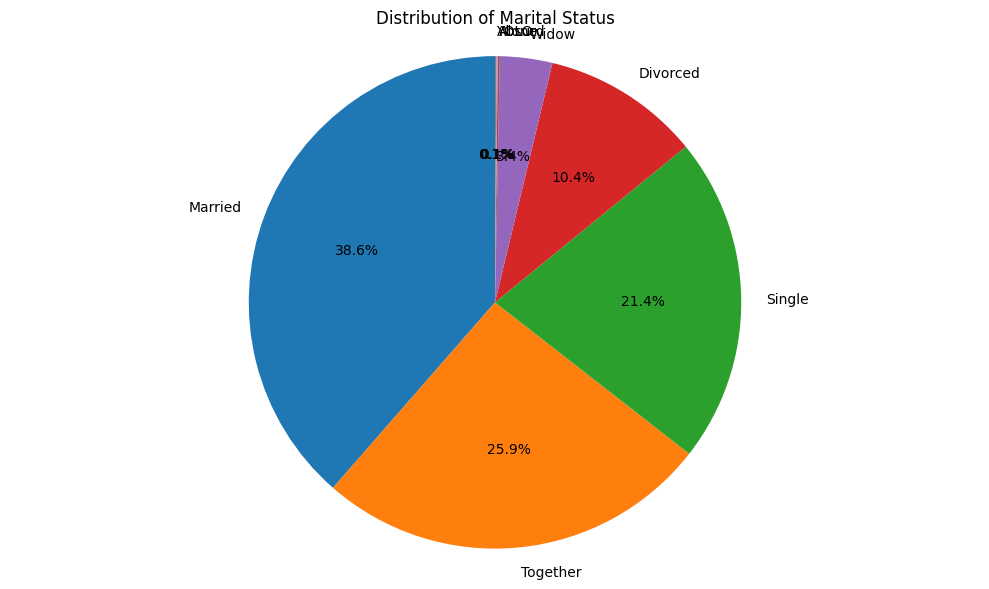

Marital Status Counts:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [301]:
marital_status_counts = df_new['Marital_Status'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Marital Status')
plt.tight_layout()
plt.show()

print("Marital Status Counts:")
print(marital_status_counts)

Ada beberapa data yang dapat digabungkan.

In [302]:
marital_mapping = {
    'Married': 'Married',
    'Together': 'Together',
    'Single': 'Single',
    'Divorced': 'Divorced',
    'Widow': 'Widow',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

df_new['Marital_Status_Simplified'] = df_new['Marital_Status'].map(marital_mapping)

print("Simplified Marital Status Distribution:")
print(df_new['Marital_Status_Simplified'].value_counts())


Simplified Marital Status Distribution:
Marital_Status_Simplified
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64


Lalu lakukan one-hot encoding untuk fitur ini, karena nilainya tidak ordinal.

In [303]:
marital_status_dummies = pd.get_dummies(df_new['Marital_Status_Simplified'], prefix='Marital')

df_new = pd.concat([df_new, marital_status_dummies], axis=1)

print("After one-hot encoding:")
print(df_new[['Marital_Status_Simplified', 'Marital_Married', 'Marital_Together', 'Marital_Single', 'Marital_Divorced', 'Marital_Widow']].head())

print("\nDataframe shape after one-hot encoding:", df_new.shape)


After one-hot encoding:
  Marital_Status_Simplified  Marital_Married  Marital_Together  \
0                    Single            False             False   
1                    Single            False             False   
2                  Together            False              True   
3                  Together            False              True   
4                   Married             True             False   

   Marital_Single  Marital_Divorced  Marital_Widow  
0            True             False          False  
1            True             False          False  
2           False             False          False  
3           False             False          False  
4           False             False          False  

Dataframe shape after one-hot encoding: (2240, 35)


Kita dapat drop fitur yang lama setelah memprosesnya.

In [304]:
columns_to_drop = ['Marital_Status', 'Marital_Status_Simplified', 'Education']
df_new = df_new.drop(columns=columns_to_drop)

print("Columns dropped:", columns_to_drop)
print("Dataframe shape after dropping categorical columns:", df_new.shape)
df_new


Columns dropped: ['Marital_Status', 'Marital_Status_Simplified', 'Education']
Dataframe shape after dropping categorical columns: (2240, 32)


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Education_Ordinal,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow
0,1957,58138.0,0,0,04-09-2012,58,635,88,546,172,...,0,3,11,1,3,False,False,True,False,False
1,1954,46344.0,1,1,08-03-2014,38,11,1,6,2,...,0,3,11,0,3,False,False,True,False,False
2,1965,71613.0,0,0,21-08-2013,26,426,49,127,111,...,0,3,11,0,3,False,False,False,True,False
3,1984,26646.0,1,0,10-02-2014,26,11,4,20,10,...,0,3,11,0,3,False,False,False,True,False
4,1981,58293.0,1,0,19-01-2014,94,173,43,118,46,...,0,3,11,0,5,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,13-06-2013,46,709,43,182,42,...,0,3,11,0,3,False,True,False,False,False
2236,1946,64014.0,2,1,10-06-2014,56,406,0,30,0,...,0,3,11,0,5,False,False,False,True,False
2237,1981,56981.0,0,0,25-01-2014,91,908,48,217,32,...,0,3,11,0,3,True,False,False,False,False
2238,1956,69245.0,0,1,24-01-2014,8,428,30,214,80,...,0,3,11,0,4,False,False,False,True,False


Data Dt_Customer kita pisahkan menjadi Year Month Day.

In [305]:
# Convert Dt_Customer to datetime format
df_new['Dt_Customer'] = pd.to_datetime(df_new['Dt_Customer'], format='%d-%m-%Y')

df_new['Customer_Year'] = df_new['Dt_Customer'].dt.year
df_new['Customer_Month'] = df_new['Dt_Customer'].dt.month
df_new['Customer_Day'] = df_new['Dt_Customer'].dt.day

print("Date features extracted from Dt_Customer:")
print(df_new[['Dt_Customer', 'Customer_Year', 'Customer_Month', 'Customer_Day']].head())

df_new = df_new.drop(columns=['Dt_Customer'])


Date features extracted from Dt_Customer:
  Dt_Customer  Customer_Year  Customer_Month  Customer_Day
0  2012-09-04           2012               9             4
1  2014-03-08           2014               3             8
2  2013-08-21           2013               8            21
3  2014-02-10           2014               2            10
4  2014-01-19           2014               1            19


Semua data telah menjadi numerik

In [306]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

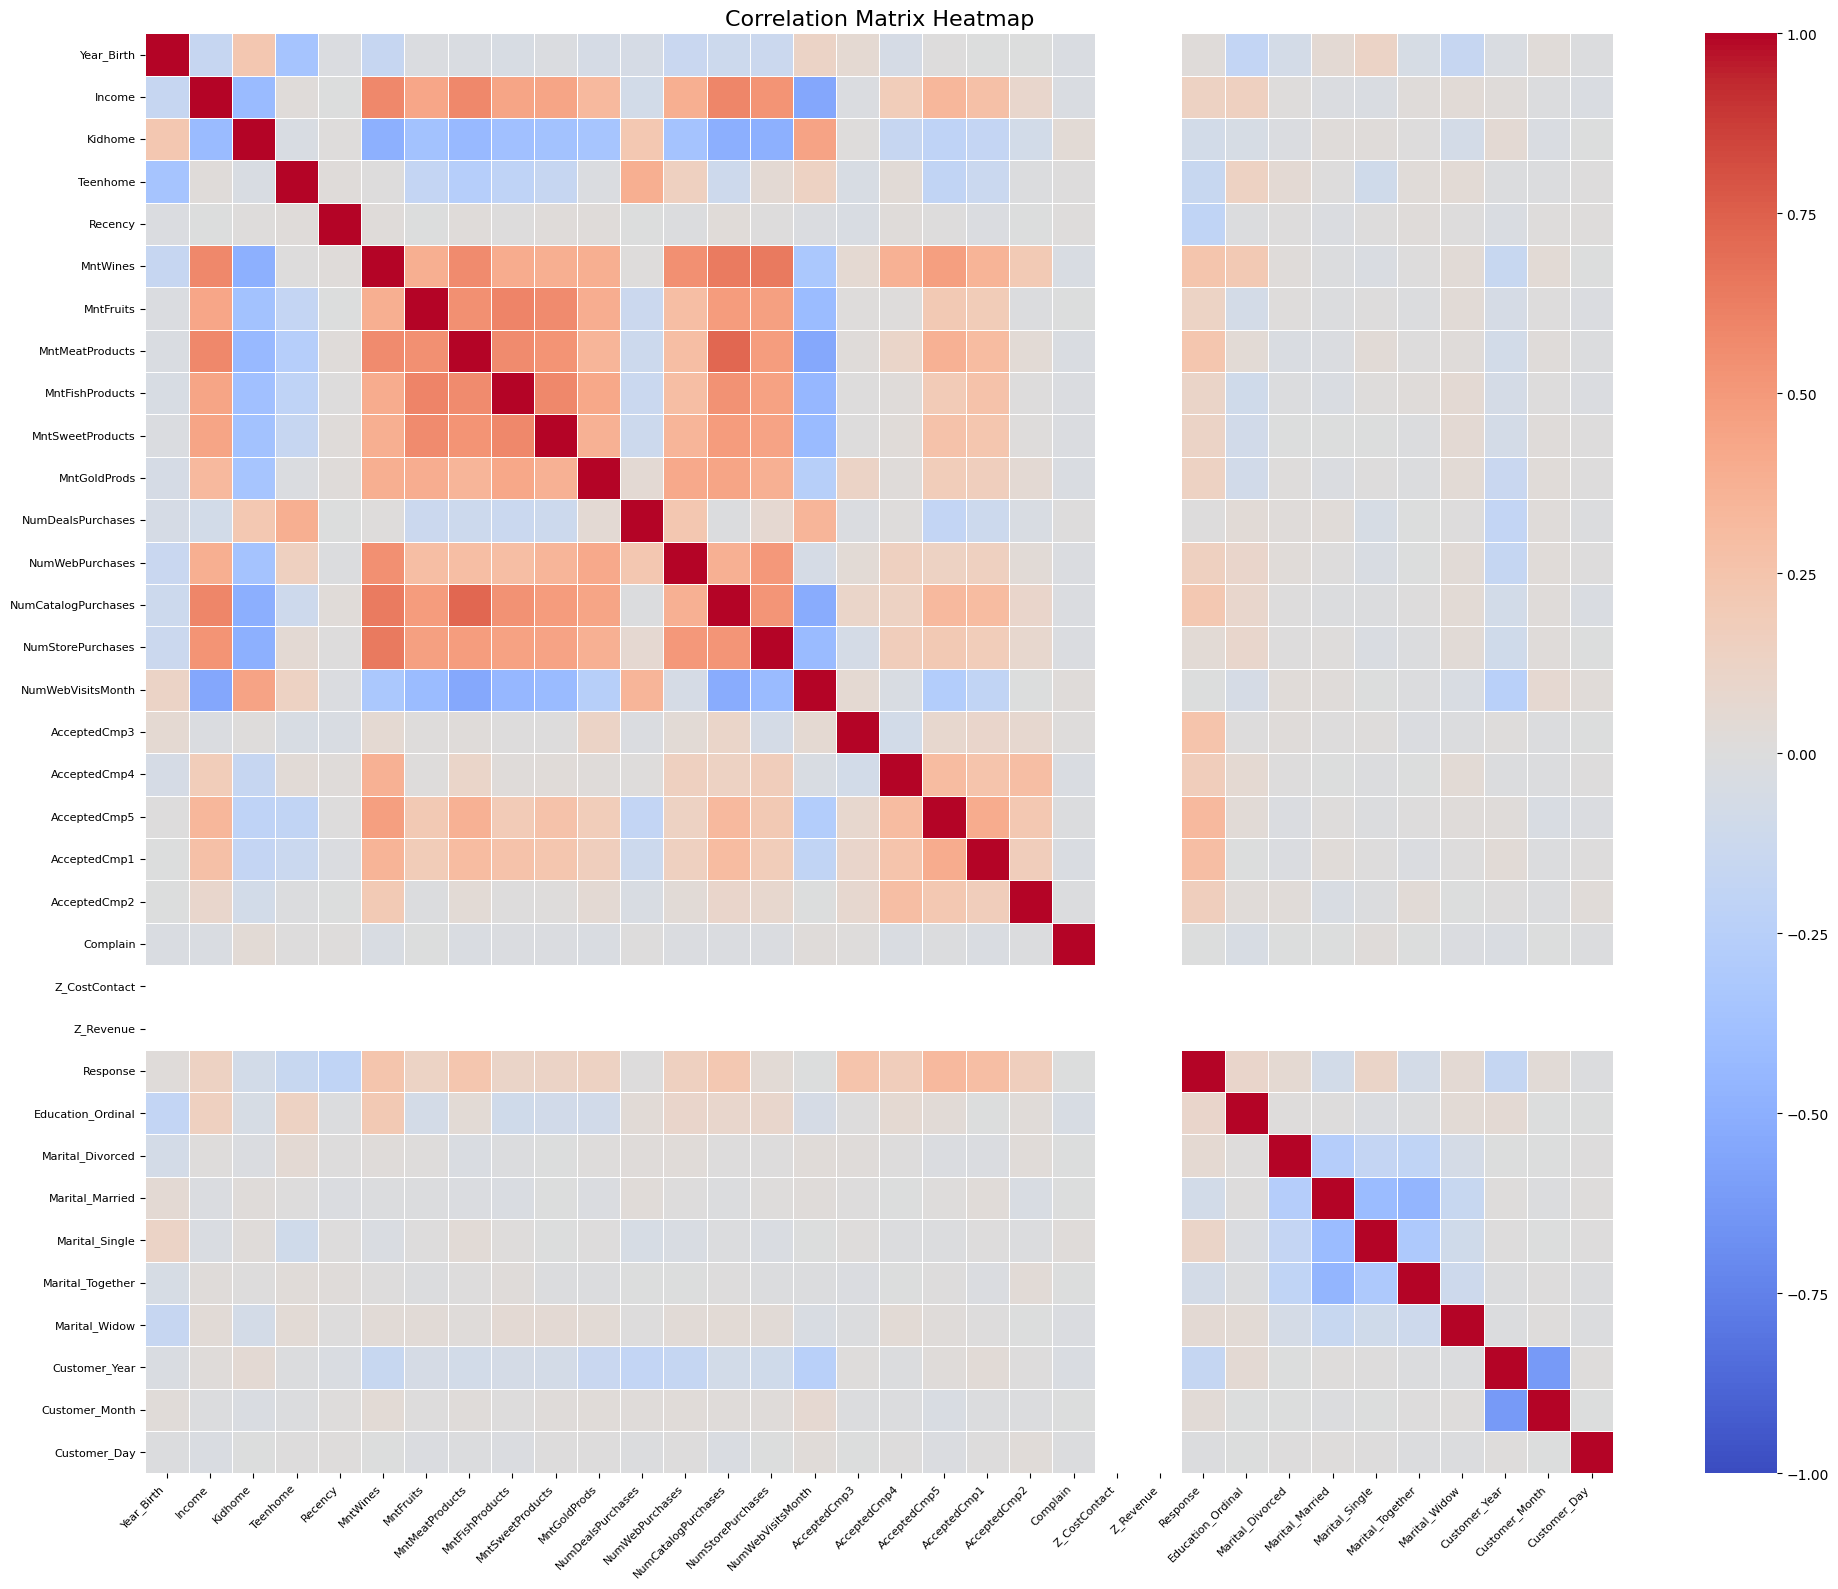

High positive correlations (>0.5):
MntMeatProducts      NumCatalogPurchases    0.723827
NumCatalogPurchases  MntMeatProducts        0.723827
NumStorePurchases    MntWines               0.642100
MntWines             NumStorePurchases      0.642100
NumCatalogPurchases  MntWines               0.635226
MntWines             NumCatalogPurchases    0.635226
MntFishProducts      MntFruits              0.594804
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
NumCatalogPurchases  Income                 0.589162
Income               MntMeatProducts        0.584633
MntMeatProducts      Income                 0.584633
MntSweetProducts     MntFishProducts        0.579870
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntWines             Income                 0.578650
MntFishProducts      MntMeatProducts        0.568402
MntMeatProducts      MntFishProducts        0.568402
MntFruits  

In [307]:
corr_matrix = df_new.corr()

plt.figure(figsize=(20, 16))

sns.heatmap(corr_matrix, 
            annot=False,
            cmap='coolwarm',
            linewidths=0.5,
            vmin=-1, 
            vmax=1)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

high_corr = corr_matrix.unstack().sort_values(ascending=False)
print("High positive correlations (>0.5):")
print(high_corr[(high_corr < 1.0) & (high_corr > 0.5)])

Sepertinya semua Z_CostContact dan Z_Revenue nilainya hanya 1 saja, jadi kita drop saja

In [308]:
df_new = df_new.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [309]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

Sepertinya pada Income ada data yang null, jadi kita masukkan dengan median saja. Karena hanya 24 baris dari 2240 yang dipengaruhi, maka tidak terlalu berdampak nantinya.

In [310]:
from sklearn.impute import SimpleImputer
df_new['Income'] = SimpleImputer(strategy='median').fit_transform(df_new[['Income']])


### Sebelum melakukan clustering, kita akan visualisasi datanya terlebih dahulu dalam 2 dimensi, agar kita tau seperti apa persebarannya.

Shape of df_new: (2240, 32)
First few rows of df_new:
   Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1957  58138.0        0         0       58       635         88   
1        1954  46344.0        1         1       38        11          1   
2        1965  71613.0        0         0       26       426         49   
3        1984  26646.0        1         0       26        11          4   
4        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Response  \
0              546              172                88  ...         1   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

   Education_Ordinal  Marital_Divorced  Marital_Married  Marit

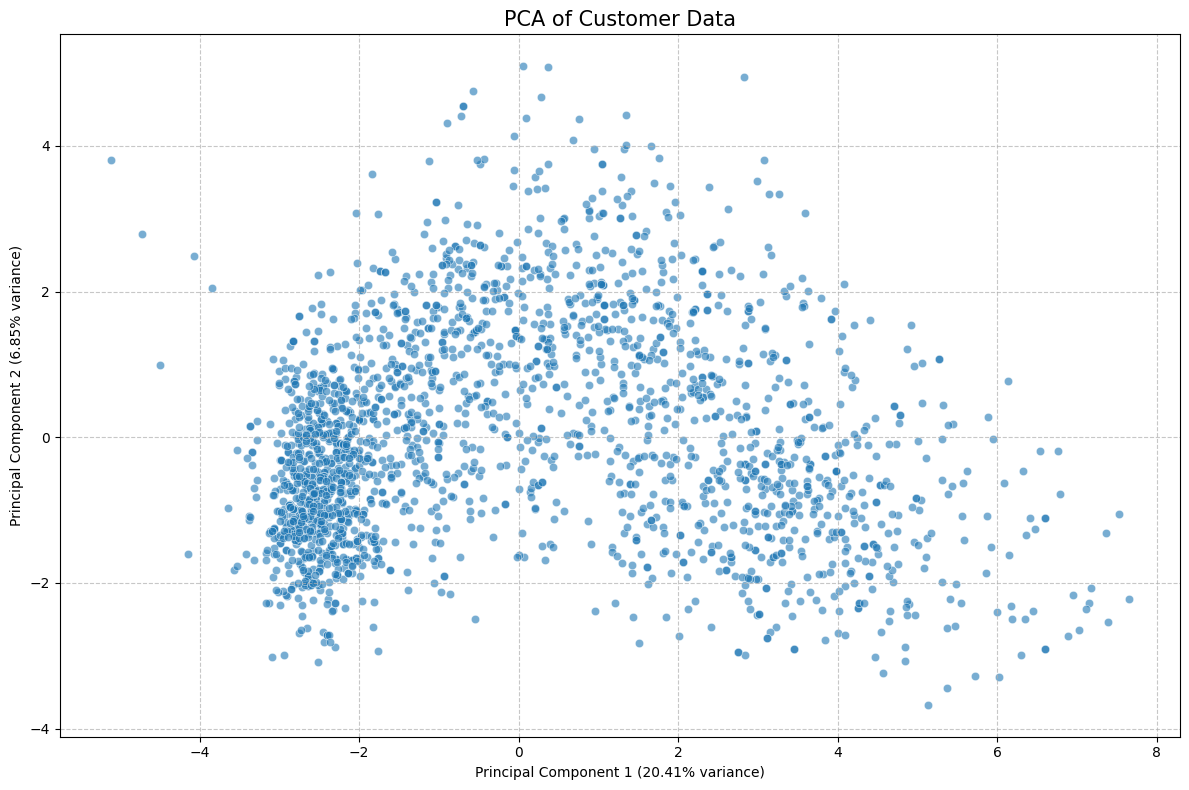

In [311]:
# Visualize the data using PCA for dimensionality reduction
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Shape of df_new:", df_new.shape)
print("First few rows of df_new:")
print(df_new.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_new)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6)
plt.title('PCA of Customer Data', fontsize=15)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Di atas adalah visualisasi persebaran data dalam 2 dimensi. Sekilas tidak terlihat adanya pemisahan, namun ada banyak data yang berada di sebelah kiri, dan selain itu tersebar dimana-mana. Kita akan mencari berapa jumlah cluster yang optimal.

In [312]:
df_new_preprocessed = df_new.copy()

In [313]:
df_new_preprocessed

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Education_Ordinal,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Customer_Year,Customer_Month,Customer_Day
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,3,False,False,True,False,False,2012,9,4
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,3,False,False,True,False,False,2014,3,8
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,3,False,False,False,True,False,2013,8,21
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,3,False,False,False,True,False,2014,2,10
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,5,False,True,False,False,False,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,3,False,True,False,False,False,2013,6,13
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,5,False,False,False,True,False,2014,6,10
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,3,True,False,False,False,False,2014,1,25
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,0,4,False,False,False,True,False,2014,1,24


In [314]:
# Pemilihan fitur
# features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntMeatProducts', 
#             'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# X = df_new_preprocessed[features] 
X = df_new_preprocessed

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Kita akan menggunakan beberapa cara untuk menentukan cluster
Pertama adalah elbow/knee method (metode siku)

Elbow method adalah teknik untuk menentukan jumlah cluster (k) yang optimal dalam algoritma clustering seperti K-Means. 
Metode ini bekerja dengan menghitung nilai inertia (jumlah kuadrat jarak dari setiap titik data ke centroid cluster terdekatnya) 
untuk berbagai nilai k.

Formula inertia dalam K-Means:
Inertia = Σ min(||x_i - μ_j||²)

Dimana:
- x_i adalah titik data
- μ_j adalah centroid cluster
- ||x_i - μ_j||² adalah jarak Euclidean kuadrat antara titik data dan centroid

Pada grafik inertia vs jumlah cluster, kita mencari "siku" atau titik di mana penambahan cluster tidak lagi 
memberikan pengurangan inertia yang signifikan. Titik ini menandakan jumlah cluster optimal.

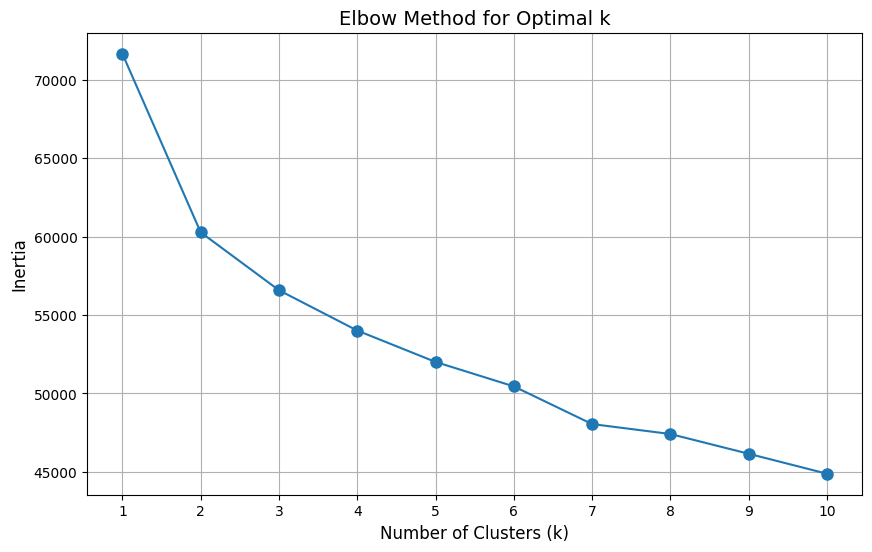

In [315]:
# Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True)
plt.xticks(k_range)
plt.show()


Perubahan terbanyak berada di k = 2 atau k = 3, maka kita coba metode lain.

# Metode Silhouette Score

Silhouette Score adalah metrik untuk mengukur seberapa baik setiap objek dikelompokkan dalam cluster-nya dibandingkan dengan cluster lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1:

- Nilai mendekati 1: objek dikelompokkan dengan tepat dalam cluster yang sesuai
- Nilai mendekati 0: objek berada di perbatasan antara dua cluster
- Nilai mendekati -1: objek mungkin ditempatkan di cluster yang salah

Silhouette Score dihitung dengan formula:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Dimana:
- $a(i)$ adalah rata-rata jarak antara objek $i$ dengan semua objek lain dalam cluster yang sama
- $b(i)$ adalah rata-rata jarak minimum antara objek $i$ dengan objek-objek di cluster lain

Silhouette Score yang tinggi menunjukkan bahwa cluster memiliki kohesi yang baik (objek dalam cluster yang sama berdekatan) dan separasi yang baik (cluster berbeda terpisah dengan jelas).


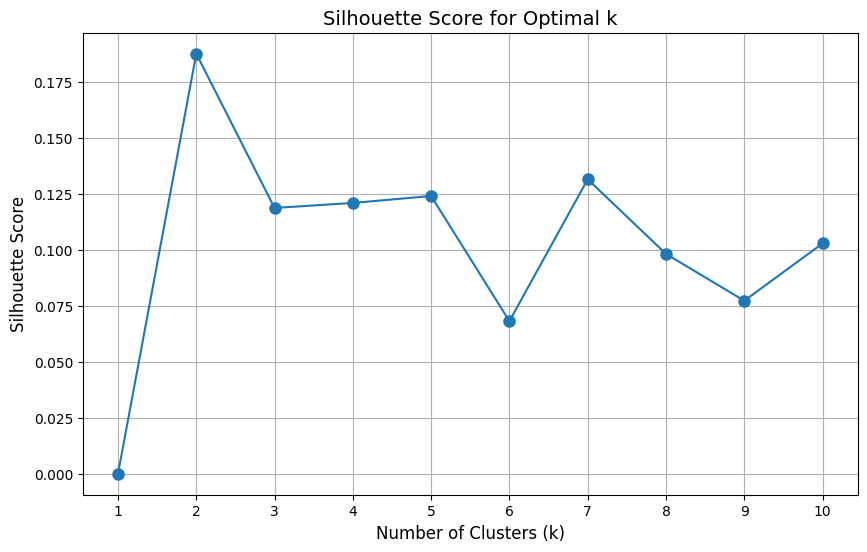

In [316]:
# Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_range:
    if k > 1:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Optimal k', fontsize=14)
plt.grid(True)
plt.xticks(k_range)
plt.show()


Score tertinggi berada di k = 2.

Calinski-Harabasz Index

adalah metrik evaluasi cluster yang mengukur rasio antara varians antar-cluster dan varians intra-cluster.

Nilai yang lebih tinggi menunjukkan cluster yang lebih terpisah dengan baik dan lebih padat.

Calinski-Harabasz Index dihitung dengan formula:

$$CH = \frac{SS_B}{SS_W} \times \frac{N-k}{k-1}$$

Dimana:
- $SS_B$ adalah jumlah kuadrat antar-cluster (between-cluster sum of squares)
- $SS_W$ adalah jumlah kuadrat intra-cluster (within-cluster sum of squares)
- $N$ adalah jumlah total data points
- $k$ adalah jumlah cluster

Semakin tinggi nilai indeks ini, semakin baik kualitas clustering yang dihasilkan.


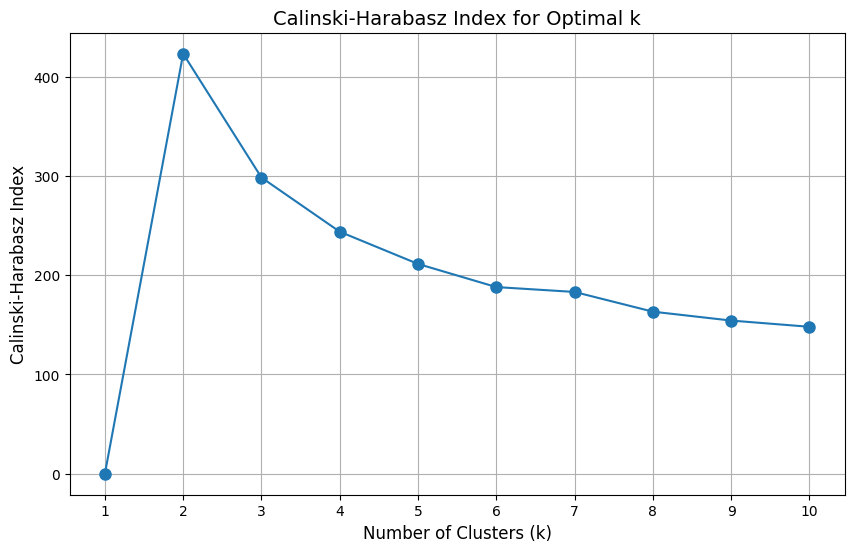

In [317]:
# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []

for k in k_range:
    if k > 1:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        calinski_avg = calinski_harabasz_score(X_scaled, cluster_labels)
        calinski_scores.append(calinski_avg)
    else:
        calinski_scores.append(0)

plt.figure(figsize=(10, 6))
plt.plot(k_range, calinski_scores, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Calinski-Harabasz Index', fontsize=12)
plt.title('Calinski-Harabasz Index for Optimal k', fontsize=14)
plt.grid(True)
plt.xticks(k_range)
plt.show()


Score tertinggi untuk index ini juga berada di k = 2

Dari ketiga metode penentuan k, hasil yang paling banyak muncul adalah k = 2, oleh karena itu akan kita gunakan.

# K-Means Clustering

K-Means Clustering adalah algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam K cluster berdasarkan kemiripan karakteristiknya. Algoritma ini bekerja dengan cara:

1. Menentukan jumlah cluster K yang diinginkan
2. Memilih K titik secara acak sebagai centroid awal
3. Mengelompokkan setiap data ke centroid terdekat
4. Menghitung ulang posisi centroid berdasarkan rata-rata data dalam cluster
5. Mengulangi langkah 3-4 hingga centroid tidak berubah signifikan

## Formula K-Means

K-Means berusaha meminimalkan Sum of Squared Distances (SSD) antara data dan centroid terdekatnya:

$$J = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij} ||x_i - \mu_j||^2$$

Dimana:
- $J$ adalah fungsi objektif yang ingin diminimalkan
- $x_i$ adalah data point ke-i
- $\mu_j$ adalah centroid cluster ke-j
- $w_{ij}$ adalah 1 jika data $x_i$ termasuk cluster j, dan 0 jika tidak
- $||x_i - \mu_j||^2$ adalah jarak Euclidean kuadrat antara data dan centroid

Algoritma ini sederhana dan efisien, namun hasilnya dapat dipengaruhi oleh inisialisasi centroid awal dan jumlah cluster K yang ditentukan.


Cluster Centers:
          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1967.078143  72150.592299  0.063420  0.423556  49.605889  607.593431   
1        1969.929993  39280.834193  0.691968  0.560059  48.786293  106.345615   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0        56.262741       365.044168        80.101925         58.062288  ...   
1         6.806927        38.050111         9.820929          6.891673  ...   

         Response  Education_Ordinal  Marital_Divorced  Marital_Married  \
Cluster                                                                   
0        0.234428           3.534541          0.114383         0.366931   
1        0.093589           3.411938          0.096536         0.397937   

         Marital_Single  Marital_Togethe

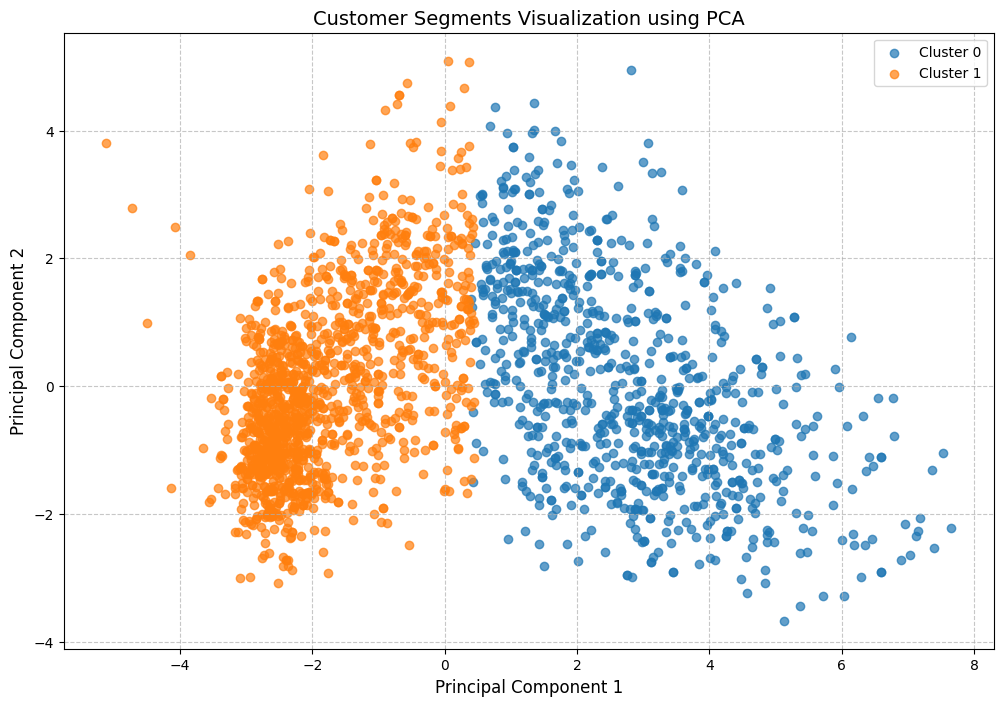

In [318]:
# Menentukan jumlah cluster optimal berdasarkan hasil analisis sebelumnya
optimal_k = 2

# Membuat model K-Means dengan 2 cluster
# random_state=42 untuk memastikan hasil yang konsisten/reproducible
# n_init=10 berarti algoritma akan dijalankan 10 kali dengan inisialisasi berbeda
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Melakukan fitting model dan prediksi cluster untuk setiap data
# fit_predict() mengembalikan label cluster (0 atau 1) untuk setiap data
df_new_preprocessed['Cluster'] = kmeans.fit_predict(X_scaled)

# Menganalisis karakteristik setiap cluster dengan menghitung nilai rata-rata fitur
cluster_analysis = df_new_preprocessed.groupby('Cluster').mean()
print("Cluster Centers:")
print(cluster_analysis)

# Menghitung jumlah data dalam setiap cluster
cluster_sizes = df_new_preprocessed['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

from sklearn.decomposition import PCA

# Mereduksi dimensi data menjadi 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(12, 8))
for cluster in range(optimal_k):
    plt.scatter(X_pca[df_new_preprocessed['Cluster'] == cluster, 0],
                X_pca[df_new_preprocessed['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Customer Segments Visualization using PCA', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Hasil K-Means clustering cukup lumayan baik untuk k = 2, hanya overlap sedikit di tengah. Sudah dicoba k = 3, namun overlap pada cluster di tengah dengan cluster di kanan dan kirinya banyak.

In [319]:
df_new_preprocessed2 = df_new.copy()
df_new_preprocessed2

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Education_Ordinal,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Customer_Year,Customer_Month,Customer_Day
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,3,False,False,True,False,False,2012,9,4
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,3,False,False,True,False,False,2014,3,8
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,3,False,False,False,True,False,2013,8,21
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,3,False,False,False,True,False,2014,2,10
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,5,False,True,False,False,False,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,3,False,True,False,False,False,2013,6,13
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,5,False,False,False,True,False,2014,6,10
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,3,True,False,False,False,False,2014,1,25
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,0,4,False,False,False,True,False,2014,1,24


# Hierarchical Clustering

Hierarchical clustering adalah metode clustering yang membangun hierarki cluster dengan pendekatan bottom-up (agglomerative) atau top-down (divisive). Metode ini memiliki beberapa keunggulan:

1. **Tidak perlu menentukan jumlah cluster di awal** - Dendrogram membantu menentukan jumlah cluster yang optimal
2. **Struktur hierarki** - Memberikan informasi tentang hubungan antar cluster pada berbagai level
3. **Fleksibilitas dalam ukuran dan bentuk cluster** - Tidak mengasumsikan cluster berbentuk bulat seperti K-Means

Metode linkage yang umum digunakan:
- **Ward**: Meminimalkan varians dalam cluster (yang kita gunakan)
- **Complete**: Jarak maksimum antar elemen
- **Single**: Jarak minimum antar elemen
- **Average**: Rata-rata jarak antar elemen

Hierarchical clustering cocok untuk dataset yang memiliki struktur hierarki alami atau ketika kita ingin melihat hubungan antar cluster pada berbagai level granularitas.


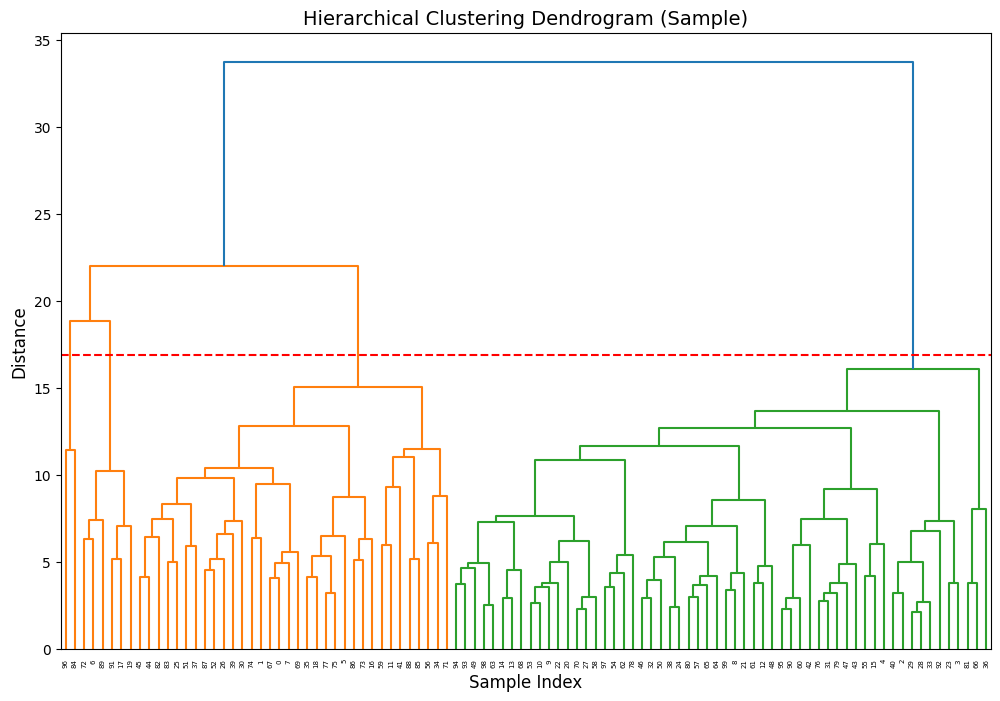

In [320]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

X = df_new_preprocessed2

# Melakukan standardisasi data untuk menghindari bias pada fitur dengan skala berbeda
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster dan membuat model hierarchical clustering
n_clusters = 2
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Melakukan fitting dan prediksi cluster untuk setiap data
df_new_preprocessed2['Cluster'] = hierarchical_cluster.fit_predict(X_scaled)

# Membuat visualisasi dendrogram untuk melihat struktur hierarki cluster
plt.figure(figsize=(12, 8))

# Mengambil sampel data untuk dendrogram karena data lengkap terlalu besar
sample_size = min(100, X_scaled.shape[0])
indices = np.random.choice(range(X_scaled.shape[0]), sample_size, replace=False)
sample_data = X_scaled[indices]

# Membuat linkage matrix dan dendrogram
linked = linkage(sample_data, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Sample)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=np.max(linked[:, 2])/2, color='r', linestyle='--')
plt.show()




Setiap kali code di run, hasil dendrogram berbeda. Dendrogram menunjukkan terkadang 2 hingga 5 cluster.

Hierarchical Cluster Centers:
          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1966.941697  62598.072325  0.236162  0.535055  48.687823  463.598524   
1        1971.659887  36375.906215  0.762712  0.462147  49.754802   59.480226   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0        39.550554       257.298893        56.603690         40.826568  ...   
1         6.018079        28.619209         8.315254          5.989831  ...   

         Response  Education_Ordinal  Marital_Divorced  Marital_Married  \
Cluster                                                                   
0        0.201476           3.549077          0.169004         0.339483   
1        0.068927           3.324294          0.003390         0.456497   

         Marital_Single  Ma

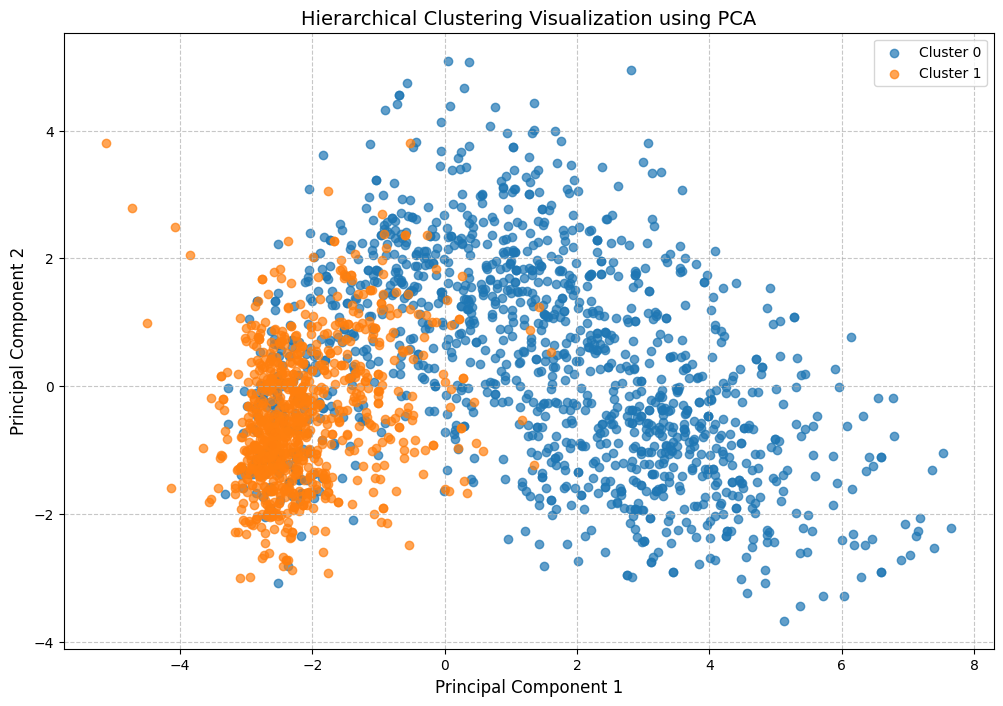

In [321]:
# Menganalisis karakteristik setiap cluster dengan menghitung nilai rata-rata
cluster_analysis = df_new_preprocessed2.groupby('Cluster').mean()
print("Hierarchical Cluster Centers:")
print(cluster_analysis)

# Menampilkan ukuran setiap cluster
cluster_sizes = df_new_preprocessed2['Cluster'].value_counts().sort_index()
print("\nHierarchical Cluster Sizes:")
print(cluster_sizes)

# Visualisasi hasil clustering menggunakan PCA untuk dimensi reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot scatter untuk setiap cluster
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    plt.scatter(X_pca[df_new_preprocessed2['Cluster'] == cluster, 0],
                X_pca[df_new_preprocessed2['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Hierarchical Clustering Visualization using PCA', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Tidak ada hasil yang bagus ketika menggunakan Hierarchal Clustering, sudah dicoba beberapa jumlah cluster dan hasilnya tidak ada yang bagus.

# Kesimpulan

Berdasarkan analisis clustering yang telah dilakukan:

1. K-means clustering dengan 2 clusters memberikan segmentasi pelanggan yang paling bermakna.
2. Hierarchical clustering tidak menghasilkan hasil yang memuaskan meskipun telah mencoba berbagai jumlah cluster.
3. Segmen pelanggan utama yang teridentifikasi adalah:
   - Pelanggan berpenghasilan tinggi dengan pengeluaran tinggi secara keseluruhan dan lebih sedikit anak
   - Pelanggan berpenghasilan lebih rendah pengeluaran lebih sedikit dan lebih banyak anak
4. Ada beberapa fitur yang mirip nilainya di 2 cluster, misalnya: Marital Status, Recency, Education, dan Date



Akan dicoba lagi clustering dengan fitur-fitur yang relevan saja

In [322]:
df_new_preprocessed3 = df_new.copy()

In [323]:
# Pemilihan fitur
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntMeatProducts', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

X = df_new_preprocessed3[features] 
# X = df_new_preprocessed

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


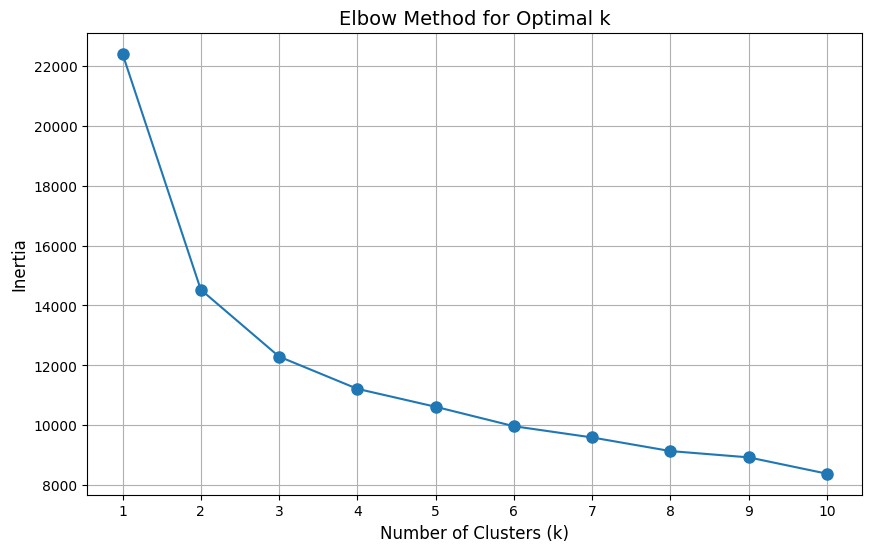

In [324]:
# Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True)
plt.xticks(k_range)
plt.show()


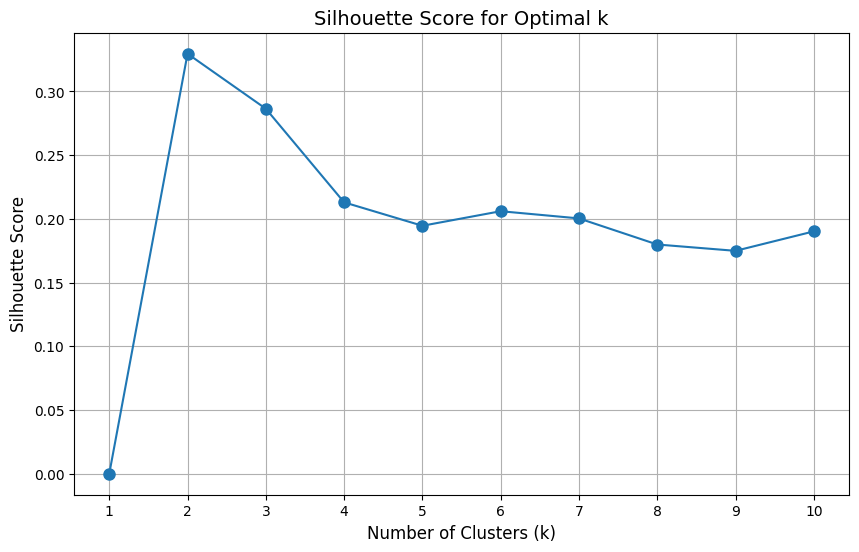

In [325]:
# Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_range:
    if k > 1:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Optimal k', fontsize=14)
plt.grid(True)
plt.xticks(k_range)
plt.show()

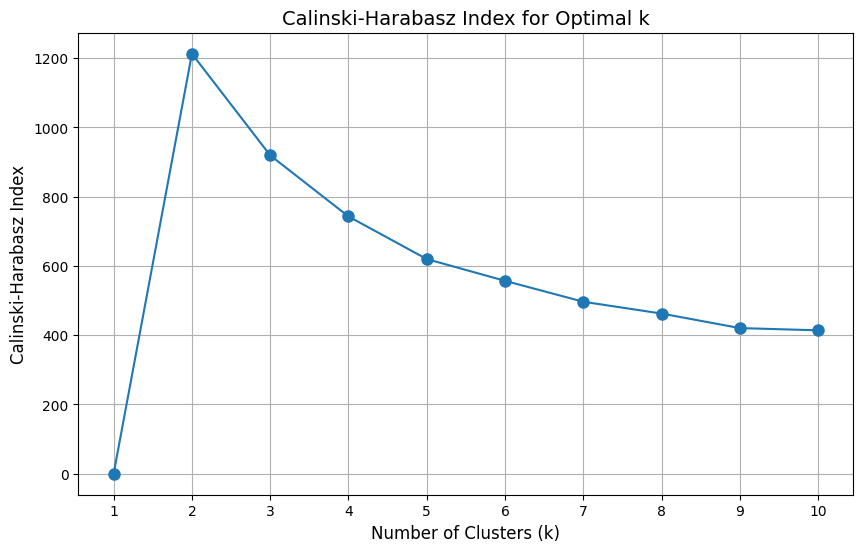

In [326]:
# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []

for k in k_range:
    if k > 1:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        calinski_avg = calinski_harabasz_score(X_scaled, cluster_labels)
        calinski_scores.append(calinski_avg)
    else:
        calinski_scores.append(0)

plt.figure(figsize=(10, 6))
plt.plot(k_range, calinski_scores, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Calinski-Harabasz Index', fontsize=12)
plt.title('Calinski-Harabasz Index for Optimal k', fontsize=14)
plt.grid(True)
plt.xticks(k_range)
plt.show()


Cluster Centers:
          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1966.599214  70633.333006  0.076621  0.504912  49.549116  585.011788   
1        1970.644026  36913.528642  0.750409  0.507365  48.743044   69.782324   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0        49.735756       328.192534        70.840864         51.621807  ...   
1         6.780687        32.625205         9.771686          6.603928  ...   

         Response  Education_Ordinal  Marital_Divorced  Marital_Married  \
Cluster                                                                   
0        0.207269           3.579568           0.11002         0.383104   
1        0.100655           3.360884           0.09820         0.387889   

         Marital_Single  Marital_Togethe

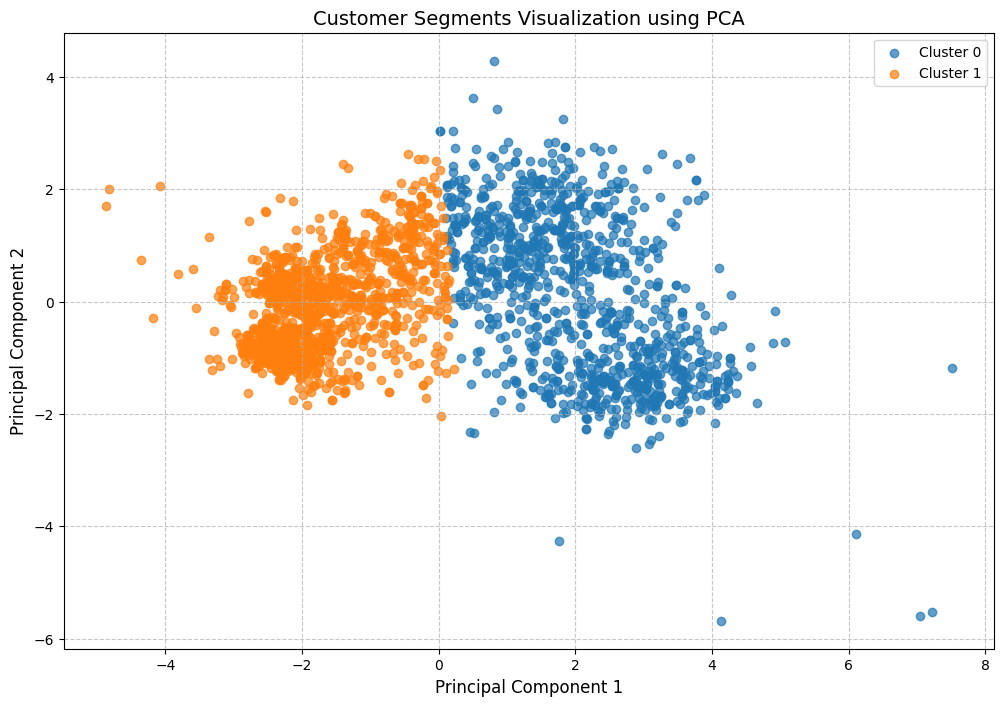

In [327]:
# Menentukan jumlah cluster optimal berdasarkan hasil analisis sebelumnya
optimal_k = 2

# Membuat model K-Means dengan 2 cluster
# random_state=42 untuk memastikan hasil yang konsisten/reproducible
# n_init=10 berarti algoritma akan dijalankan 10 kali dengan inisialisasi berbeda
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Melakukan fitting model dan prediksi cluster untuk setiap data
# fit_predict() mengembalikan label cluster (0 atau 1) untuk setiap data
df_new_preprocessed3['Cluster'] = kmeans.fit_predict(X_scaled)

# Menganalisis karakteristik setiap cluster dengan menghitung nilai rata-rata fitur
cluster_analysis = df_new_preprocessed3.groupby('Cluster').mean()
print("Cluster Centers:")
print(cluster_analysis)

# Menghitung jumlah data dalam setiap cluster
cluster_sizes = df_new_preprocessed3['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

from sklearn.decomposition import PCA

# Mereduksi dimensi data menjadi 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(12, 8))
for cluster in range(optimal_k):
    plt.scatter(X_pca[df_new_preprocessed3['Cluster'] == cluster, 0],
                X_pca[df_new_preprocessed3['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Customer Segments Visualization using PCA', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Persebaran lebih tidak acak, terlihat bahwa titik-titik menumpuk di clusternya masing-masing.

In [328]:
df_new_preprocessed4 = df_new.copy()

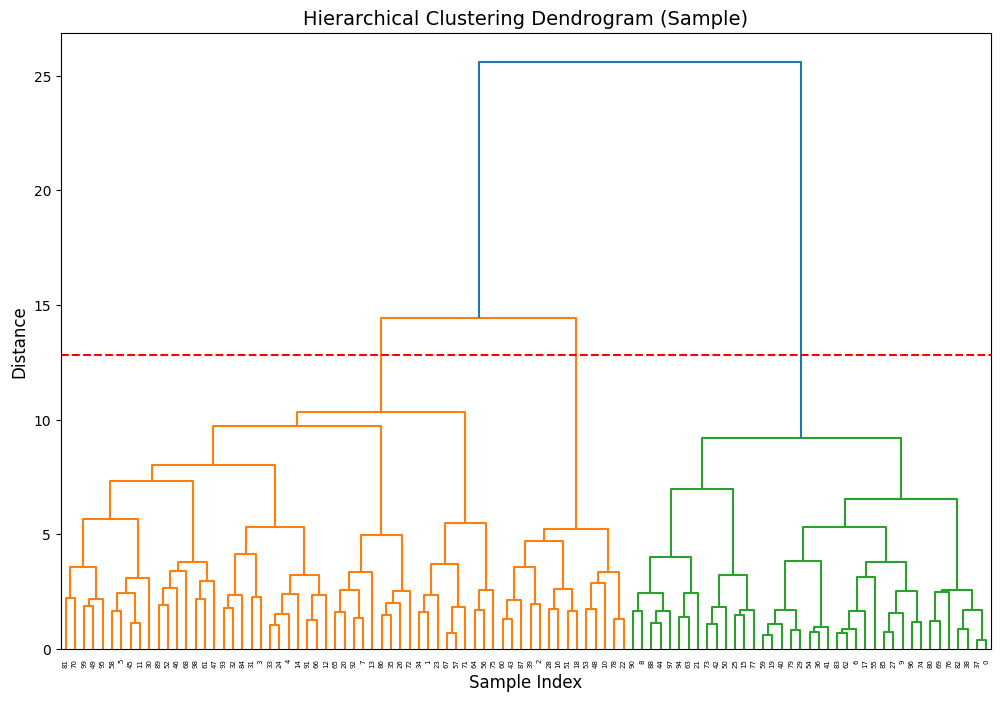

In [329]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Pemilihan fitur
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntMeatProducts', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Menggunakan fitur yang telah dipilih
X = df_new_preprocessed4[features]

# Melakukan standardisasi data untuk menghindari bias pada fitur dengan skala berbeda
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster dan membuat model hierarchical clustering
n_clusters = 3
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Melakukan fitting dan prediksi cluster untuk setiap data
df_new_preprocessed4['Cluster'] = hierarchical_cluster.fit_predict(X_scaled)

# Membuat visualisasi dendrogram untuk melihat struktur hierarki cluster
plt.figure(figsize=(12, 8))

# Mengambil sampel data untuk dendrogram karena data lengkap terlalu besar
sample_size = min(100, X_scaled.shape[0])
indices = np.random.choice(range(X_scaled.shape[0]), sample_size, replace=False)
sample_data = X_scaled[indices]

# Membuat linkage matrix dan dendrogram
linked = linkage(sample_data, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Sample)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=np.max(linked[:, 2])/2, color='r', linestyle='--')
plt.show()


Hierarchical Cluster Centers:
          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1971.685634  35539.197761  0.797575  0.411381  48.756530   49.842351   
1        1965.114774  62342.791209  0.168498  0.843712  47.919414  519.007326   
2        1968.621777  79817.475645  0.005731  0.005731  52.985673  579.707736   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0         6.875000        29.185634        10.486007          6.579291  ...   
1        34.126984       177.785104        46.724054         36.781441  ...   
2        67.613181       564.684814        98.994269         67.174785  ...   

         Response  Education_Ordinal  Marital_Divorced  Marital_Married  \
Cluster                                                                   
0        0.095149 

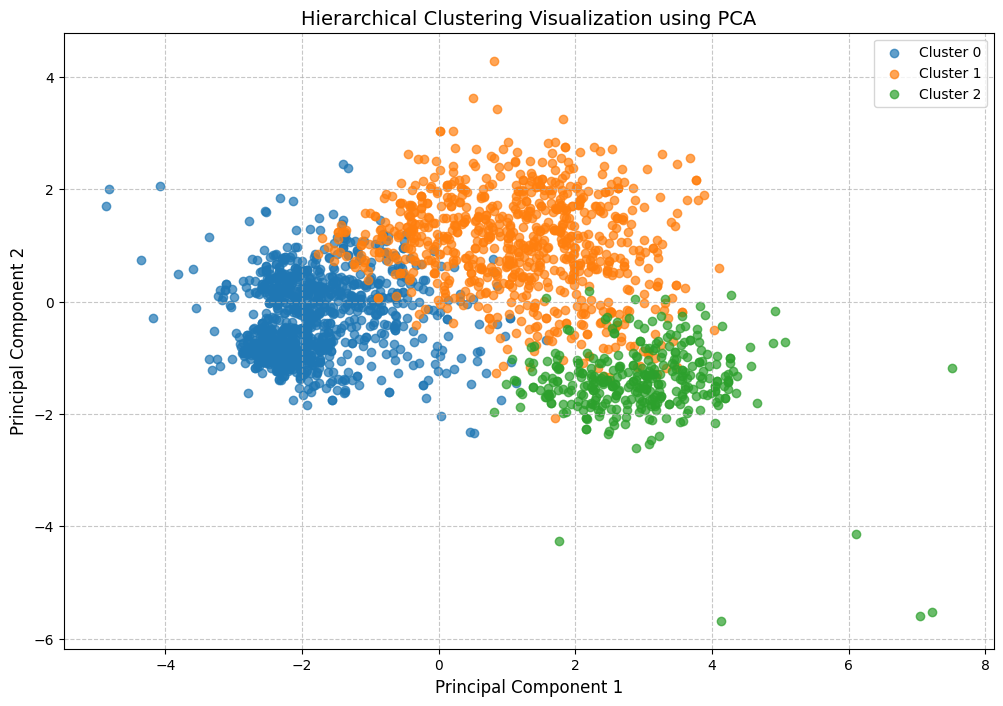

In [330]:
# Menganalisis karakteristik setiap cluster dengan menghitung nilai rata-rata
cluster_analysis = df_new_preprocessed4.groupby('Cluster').mean()
print("Hierarchical Cluster Centers:")
print(cluster_analysis)

# Menampilkan ukuran setiap cluster
cluster_sizes = df_new_preprocessed4['Cluster'].value_counts().sort_index()
print("\nHierarchical Cluster Sizes:")
print(cluster_sizes)

# Visualisasi hasil clustering menggunakan PCA untuk dimensi reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot scatter untuk setiap cluster
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    plt.scatter(X_pca[df_new_preprocessed4['Cluster'] == cluster, 0],
                X_pca[df_new_preprocessed4['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Hierarchical Clustering Visualization using PCA', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Hasil paling bagus dari Hierarchal Clustering berada di 3 cluster, namun hasilnya masih tidak lebih bagus dari K-Means dengan 2 cluster.

# Kesimpulan

Dari analisis clustering yang telah dilakukan, dapat disimpulkan bahwa:
1. K-Means dengan 2 cluster memberikan hasil terbaik untuk segmentasi pelanggan
2. Hierarchical Clustering dengan 3 cluster juga memberikan hasil yang baik, namun tidak lebih optimal dibandingkan K-Means
3. Lebih baik seleksi fitur daripada tidak
